# Zbiór danych - wyniki wyborów do Parlamentu Europejskiego 2019 w Polsce

2019-european-parliament-election-in-poland-data

Źródło: Kaggle, https://www.kaggle.com/datasets/brezniczky/2019-european-parliament-election-in-poland-data

Zbiór składa się z 13 arkuszy - po jednym dla każdego okręgu wyborczego. W każdym arkuszu znajdują się informacje o liczbie głosów oddanych na poszczególnych kandydatów w poszczególnych obwodach, wraz z charakterystyką obwodu (wieś/miasto, przynależność do powiatu i gminy, dokładna lokalizacja, informacja o frekwencji i głosach nieważnych). W ramach preprocesingu, połączyliśmy wszystkie arkusze w pojedynczą strukturę danych, sumując głosy na kandydatów danego komitetu wyborczego w poszczególnym obwodzie do zbiorczego dla tego obwodu wyniku komitetu.

# Prezentacja danych przed preprocessingiem

In [1]:
#Testowe wczytanie pojedynczego arkusza z danymi (1 z 13)
import pandas as pd
data_district_1=pd.read_csv('2019-european-parliament-election-in-poland-data/wyniki_gl_na_kand_po_obwodach_sheet_1.csv')
data_district_1

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,2 KNUTH Maciej,3 JANOWICZ Kamila Marta,4 WIŚNIEWSKI Radosław Andrzej,5 PAWEŁCZAK Barnaba Bogusz,6 STRUK Anna Marta,7 WARDA Małgorzata Maja,8 MAKRENEK Helena Cecylia,9 DOMŻALSKA Elżbieta Maria,10 GRAJKOWSKI Piotr,Razem.6
0,220101,1,wieś,stały,Gminna Biblioteka i Ośrodek Kultury w Borzytuc...,gm. Borzytuchom,bytowski,pomorskie,1199,1583,...,0,1,0,0,0,0,0,0,0,4
1,220101,2,wieś,stały,"Sala wiejska, Dąbrówka 22, 77-100 Bytów",gm. Borzytuchom,bytowski,pomorskie,349,463,...,2,0,0,0,0,0,0,0,0,2
2,220101,3,wieś,stały,"Szkoła Podstawowa, Niedarzyno 21b, 77-141 Borz...",gm. Borzytuchom,bytowski,pomorskie,319,424,...,0,0,0,0,0,0,0,0,0,2
3,220102,1,miasto,stały,"Zespół Szkół Ogólnokształcących, ul. Gdańska 5...",gm. Bytów,bytowski,pomorskie,1180,1550,...,0,0,0,0,0,0,0,0,1,1
4,220102,2,miasto,stały,"Zespół Szkół Ponadgimnazjalnych, ul. Gen. Wład...",gm. Bytów,bytowski,pomorskie,1062,1392,...,0,0,0,1,0,0,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,226401,17,miasto,stały,Spółdzielnia Mieszkaniowa im. J. I. Kraszewske...,m. Sopot,Sopot,pomorskie,1219,1615,...,1,0,0,3,0,1,0,0,1,10
1392,226401,18,miasto,stały,"Zespół Szkół Handlowych, ul. Wejherowska 1, 81...",m. Sopot,Sopot,pomorskie,719,954,...,1,2,1,0,1,1,0,2,0,9
1393,226401,19,miasto,stały,"Miejska Biblioteka Publiczna Filia Nr 8, ul. M...",m. Sopot,Sopot,pomorskie,1091,1417,...,0,0,0,0,1,0,0,0,0,5
1394,226401,20,miasto,stały,Szkoła Podstawowa z Oddziałami Integracyjnymi ...,m. Sopot,Sopot,pomorskie,1078,1437,...,1,1,1,0,2,0,0,0,0,11


In [2]:
#Opis danych z arkusza testowego
data_district_1.describe(include='all')

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,2 KNUTH Maciej,3 JANOWICZ Kamila Marta,4 WIŚNIEWSKI Radosław Andrzej,5 PAWEŁCZAK Barnaba Bogusz,6 STRUK Anna Marta,7 WARDA Małgorzata Maja,8 MAKRENEK Helena Cecylia,9 DOMŻALSKA Elżbieta Maria,10 GRAJKOWSKI Piotr,Razem.6
count,1396.000000,1396.000000,1396,1396,1396,1396,1396,1396,1396.000000,1396.000000,...,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
unique,NaN,NaN,2,8,1267,123,20,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,miasto,stały,Szkoła Podstawowa Nr 2 z Oddziałami Sportowymi...,m. Gdańsk,Gdańsk,pomorskie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,759,1314,5,198,198,1396,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,222342.944126,25.264327,NaN,NaN,NaN,NaN,NaN,NaN,963.150430,1264.388252,...,0.534384,0.573066,0.310172,0.208453,0.575931,0.409742,0.128940,0.213467,0.506447,6.035100
std,2399.816744,41.512458,NaN,NaN,NaN,NaN,NaN,NaN,475.617459,640.724087,...,0.998691,1.179134,0.664888,0.488095,0.933238,0.792269,0.399633,0.505445,0.823900,5.392367
min,220101.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220604.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,593.750000,776.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,221302.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,970.000000,1267.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,226101.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,1295.000000,1707.250000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,9.000000


# Preprocessing

In [3]:
#Wczytanie i obróbka całości danych

big_dataset = pd.DataFrame()

#Trzeba wczytać każdy z 13 arkuszy z danymi dla poszczególnych okręgów wyborczych
for i in range(1,14):
    filename = '2019-european-parliament-election-in-poland-data/wyniki_gl_na_kand_po_obwodach_sheet_'+str(i)+'.csv'
    data_district = pd.read_csv(filename)
    data_district['obwod'] = i
    df = data_district.copy()
    cols_to_remove = []
    for c in range(35,len(df.columns)):
        cols_to_remove.append(c)
    #Wycięcie nadmiarowych danych - szczegółowych informacji o głosach na poszczególnych kandydatów w poszczególnych komisjach
    df.drop(df.columns[cols_to_remove],axis=1,inplace=True)
    #Uwzględnienie w danych zbiorczych wyników komitetów wyborczych w poszczególnych komisjach
    df['Konfederacja'] = data_district['Lista nr 1 - KWW KONFEDERACJA KORWIN BRAUN LIROY NARODOWCY']
    df['Wiosna'] = data_district['Lista nr 2 - KW WIOSNA ROBERTA BIEDRONIA']
    df['Koalicja Europejska'] = data_district['Lista nr 3 - KKW KOALICJA EUROPEJSKA PO PSL SLD .N ZIELONI']
    df['Prawo i Sprawiedliwość'] = data_district['Lista nr 4 - KW PRAWO I SPRAWIEDLIWOŚĆ']
    df['Lewica Razem'] = data_district['Lista nr 5 - KKW LEWICA RAZEM - RAZEM, UNIA PRACY, RSS']
    df['Kukiz15'] = data_district['Lista nr 6 - KWW KUKIZ\'15']
    #Poniżej trzy komitety, które były zarejestrowane tylko w niektórych okręgach wyborczych
    if 'Lista nr 7 - KWW POLSKA FAIR PLAY BEZPARTYJNI GWIAZDOWSKI' in data_district.columns:
        df['Polska Fair Play'] = data_district['Lista nr 7 - KWW POLSKA FAIR PLAY BEZPARTYJNI GWIAZDOWSKI']
    else:
        df['Polska Fair Play'] = 0
    if 'Lista nr 9 - KKW POLEXIT - KOALICJA' in data_district.columns:
        df['POLEXIT'] = data_district['Lista nr 9 - KKW POLEXIT - KOALICJA']
    else:
        df['POLEXIT'] = 0
    if 'Lista nr 10 - KW JEDNOŚĆ NARODU' in data_district.columns:
        df['Jedność Narodu'] = data_district['Lista nr 10 - KW JEDNOŚĆ NARODU']
    else:
        df['Jedność Narodu'] = 0
    #Dodanie kolumny przechowującej informację o tym, w którym okręgu znajduje się dana komisja
    df['obwod'] = i
    
    #Doklejenie wczytanych dla okręgu i obrobionych danych do głównego zbioru
    big_dataset = pd.concat([big_dataset,df])
    
#Opis głównego zbioru
big_dataset.describe(include='all')

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,Konfederacja,Wiosna,Koalicja Europejska,Prawo i Sprawiedliwość,Lewica Razem,Kukiz15,Polska Fair Play,POLEXIT,Jedność Narodu,obwod
count,27285.000000,27285.000000,27285,27285,27285,27285,27285,27285,27285.000000,27285.000000,...,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000
unique,NaN,NaN,5,11,24676,2415,372,16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,wieś,stały,"Szkoła Podstawowa Nr 89, os. Piastów 34a, 31-6...",m. Kraków,Warszawa,mazowieckie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,13653,25426,7,450,787,3689,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,166300.613451,38.968921,NaN,NaN,NaN,NaN,NaN,NaN,848.402566,1103.861169,...,22.766648,30.308778,192.411032,226.966465,6.184534,18.455708,2.712589,0.289536,0.081034,7.594502
std,89754.821954,113.809837,NaN,NaN,NaN,NaN,NaN,NaN,445.941482,587.857259,...,19.426998,32.947553,180.300466,132.484900,6.526254,14.381175,5.198346,0.943785,0.451984,3.636784
min,20101.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101004.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,654.000000,...,9.000000,7.000000,52.000000,132.000000,2.000000,8.000000,0.000000,0.000000,0.000000,5.000000
50%,146513.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,811.000000,1068.000000,...,19.000000,20.000000,138.000000,214.000000,4.000000,16.000000,0.000000,0.000000,0.000000,8.000000
75%,241710.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1170.000000,1527.000000,...,33.000000,43.000000,285.000000,306.000000,9.000000,26.000000,3.000000,0.000000,0.000000,11.000000


# Proste wizualizacje zbioru danych

Text(0.5, 0, 'Liczba głosów [miliony]')

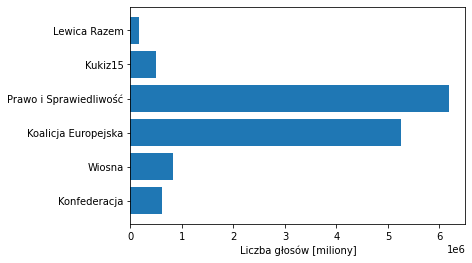

In [4]:
#Prosta wizualizacja ogólnopolskich wyników głównych komitetów
import matplotlib.pyplot as plt

cols = ['Konfederacja', 'Wiosna','Koalicja Europejska', 'Prawo i Sprawiedliwość', 'Kukiz15', 'Lewica Razem']
plt.barh(cols,big_dataset[cols].sum())
plt.xlabel("Liczba głosów [miliony]")

Porównanie z wynikami wyborów z Wikipedii

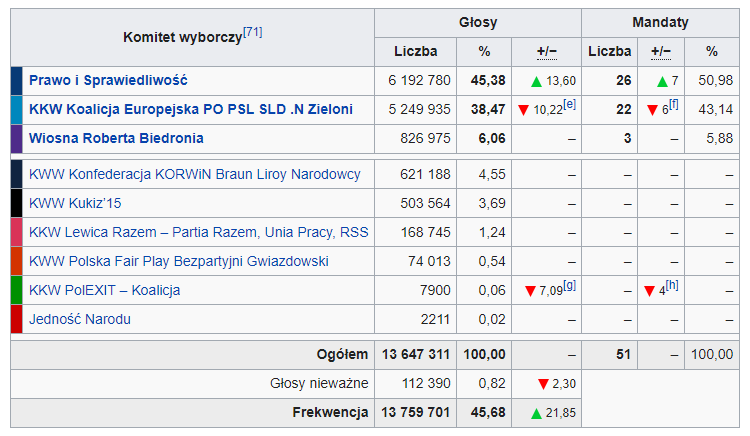

Text(0, 0.5, 'Średnia frekwencja [%]')

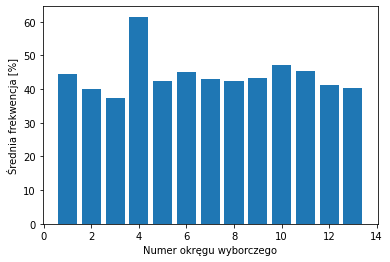

In [5]:
# Prezentacja danych dotyczących frekwencji
big_dataset["frekwencja"] = (big_dataset["Liczba kart wyjętych z urny"]/big_dataset["Liczba wyborców uprawnionych do głosowania"])*100
# print(big_dataset["frekwencja"])
# print(big_dataset.groupby(['obwod'])['frekwencja'].mean('frekwencja'))

frekwencja_po_obwodach = pd.DataFrame(big_dataset.groupby(['obwod'])['frekwencja'].mean('frekwencja'))
# print(frekwencja_po_obwodach['frekwencja'])

plt.bar(big_dataset['obwod'].unique(), frekwencja_po_obwodach['frekwencja'])
plt.xlabel("Numer okręgu wyborczego")
plt.ylabel("Średnia frekwencja [%]")

In [6]:
woj_obwod = big_dataset.groupby(['Województwo','obwod']).size().reset_index().drop(columns=0).sort_values(by=['obwod'])
print(woj_obwod)
woj_obwod = woj_obwod.groupby('obwod')['Województwo'].apply(lambda x: " + ".join(x))
print(woj_obwod)
woj_obwod_dict = dict(zip(woj_obwod.index, woj_obwod))

            Województwo  obwod
10            pomorskie      1
1    kujawsko-pomorskie      2
11  warmińsko-mazurskie      3
9             podlaskie      3
4           mazowieckie      4
5           mazowieckie      5
14              łódzkie      6
12        wielkopolskie      7
2             lubelskie      8
8          podkarpackie      9
16       świętokrzyskie     10
6           małopolskie     10
15              śląskie     11
7              opolskie     12
0          dolnośląskie     12
13   zachodniopomorskie     13
3              lubuskie     13
obwod
1                           pomorskie
2                  kujawsko-pomorskie
3     warmińsko-mazurskie + podlaskie
4                         mazowieckie
5                         mazowieckie
6                             łódzkie
7                       wielkopolskie
8                           lubelskie
9                        podkarpackie
10       świętokrzyskie + małopolskie
11                            śląskie
12            opol

In [7]:
woj_obwod_dict

{1: 'pomorskie',
 2: 'kujawsko-pomorskie',
 3: 'warmińsko-mazurskie + podlaskie',
 4: 'mazowieckie',
 5: 'mazowieckie',
 6: 'łódzkie',
 7: 'wielkopolskie',
 8: 'lubelskie',
 9: 'podkarpackie',
 10: 'świętokrzyskie + małopolskie',
 11: 'śląskie',
 12: 'opolskie + dolnośląskie',
 13: 'zachodniopomorskie + lubuskie'}

In [8]:
print(big_dataset.columns)

Index(['Kod terytorialny gminy', 'Nr obwodu głosowania', 'Typ obszaru',
       'Typ obwodu', 'Siedziba Obwodowej Komisji Wyborczej', 'Gmina', 'Powiat',
       'Województwo', 'Komisja otrzymała kart do głosowania',
       'Liczba wyborców uprawnionych do głosowania',
       'w tym umieszczonych w części A spisu wyborców',
       'w tym umieszczonych w części B spisu wyborców',
       'Nie wykorzystano kart do głosowania',
       'Liczba wyborców, którym wydano karty do głosowania',
       'w tym w części A spisu wyborców', 'w tym w części B spisu wyborców',
       'Liczba wyborców głosujących przez pełnomocnika',
       'Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania',
       'Liczba wyborców, którym wysłano pakiety wyborcze',
       'Liczba otrzymanych kopert zwrotnych',
       'Liczba kopert zwrotnych, w których nie było oświadczenia o osobistym i tajnym oddaniu głosu',
       'Liczba kopert zwrotnych, w których oświadczenie nie było podpisane',
       '

In [9]:
import plotnine as gg
import numpy as np

In [10]:
cols = ['Typ obszaru','Liczba kart wyjętych z urny', 'Liczba wyborców uprawnionych do głosowania', 'frekwencja', 'obwod']
# 

dataset=big_dataset[cols]
# print(dataset.head)
count_obwody = pd.DataFrame(dataset.groupby(['obwod', 'Typ obszaru']).sum("Liczba wyborców uprawnionych do głosowania")).reset_index()
count_obwody = count_obwody.replace({"obwod": woj_obwod_dict})
# print(count_obwody.columns, count_obwody.head)
frek_obwody = pd.DataFrame(dataset.groupby(['obwod', 'Typ obszaru'])['frekwencja'].mean('frekwencja')).reset_index()
frek_obwody = (frek_obwody[frek_obwody['Typ obszaru'].isin(["miasto", "wieś"])])
frek_obwody = frek_obwody.replace({"obwod": woj_obwod_dict})

In [42]:
miasta = big_dataset.groupby(["Województwo", "Powiat"])[['Powiat','Liczba kart wyjętych z urny']].sum('Liczba kart wyjętych z urny')
max_miasta = miasta.reset_index()
# print(max_miasta)
idx =  max_miasta.groupby(["Województwo"])['Liczba kart wyjętych z urny'].transform(max) == max_miasta['Liczba kart wyjętych z urny']
max_miasta = max_miasta[idx]
print(max_miasta)


             Województwo        Powiat  Liczba kart wyjętych z urny
3           dolnośląskie       Wrocław                       272486
30    kujawsko-pomorskie     Bydgoszcz                       134706
55             lubelskie        Lublin                       135619
78              lubuskie  Zielona Góra                        55053
95           mazowieckie      Warszawa                       842309
135          małopolskie        Kraków                       330852
157             opolskie         Opole                        50594
171         podkarpackie       Rzeszów                        77423
194            podlaskie     Białystok                       109552
211            pomorskie        Gdańsk                       197020
232  warmińsko-mazurskie       Olsztyn                        64868
255        wielkopolskie        Poznań                       230796
288   zachodniopomorskie      Szczecin                       152780
327              łódzkie          Łódź          

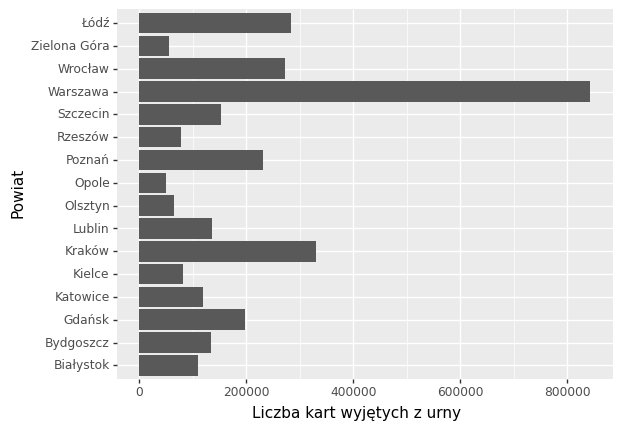

<ggplot: (165727773398)>

In [43]:
(
    gg.ggplot(max_miasta, gg.aes(x = "Powiat", y = "Liczba kart wyjętych z urny"))
    + gg.geom_col()
    + gg.coord_flip()
)

In [12]:
print(count_obwody.columns, count_obwody)
# print(frek_obwody.columns, frek_obwody)

Index(['obwod', 'Typ obszaru', 'Liczba kart wyjętych z urny',
       'Liczba wyborców uprawnionych do głosowania', 'frekwencja'],
      dtype='object')                               obwod    Typ obszaru   
0                         pomorskie         miasto  \
1                         pomorskie           wieś   
2                kujawsko-pomorskie         miasto   
3                kujawsko-pomorskie  miasto i wieś   
4                kujawsko-pomorskie           wieś   
5   warmińsko-mazurskie + podlaskie         miasto   
6   warmińsko-mazurskie + podlaskie  miasto i wieś   
7   warmińsko-mazurskie + podlaskie           wieś   
8                       mazowieckie         miasto   
9                       mazowieckie  miasto i wieś   
10                      mazowieckie         statek   
11                      mazowieckie           wieś   
12                      mazowieckie      zagranica   
13                      mazowieckie         miasto   
14                      mazowieckie  m

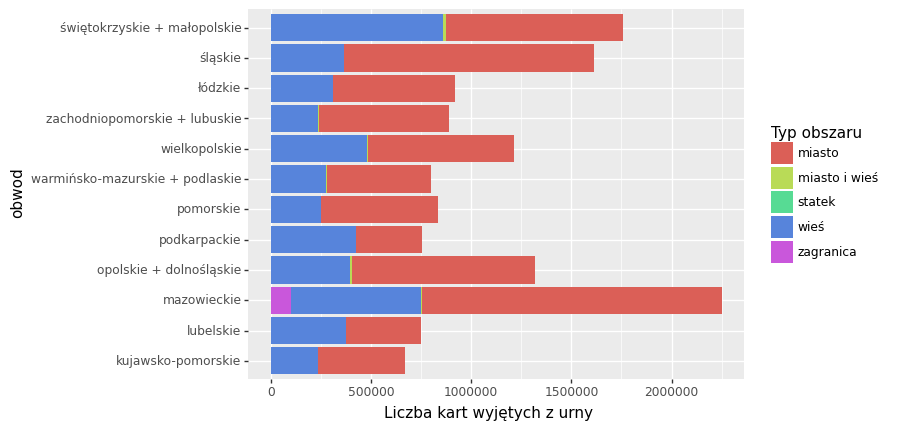

<ggplot: (165726149117)>

In [13]:
(
    gg.ggplot(count_obwody) 
    + gg.aes(x="obwod", y="Liczba kart wyjętych z urny", fill = 'Typ obszaru')
    +gg.geom_col(position="stack")
    + gg.coord_flip()
)

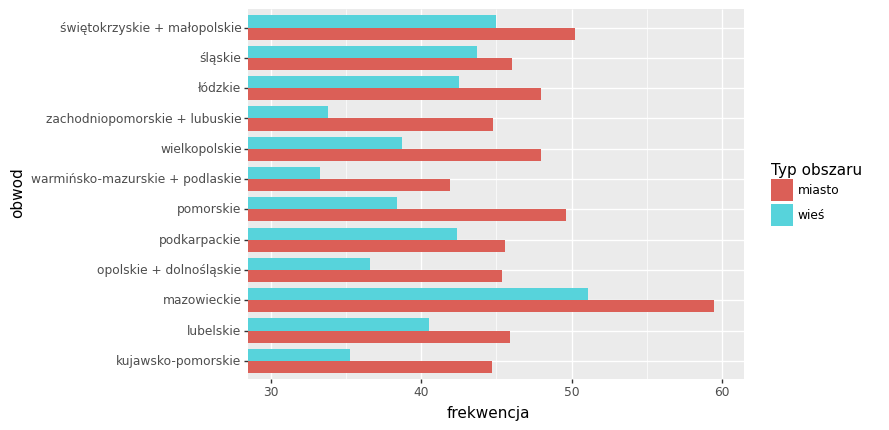

<ggplot: (165726207266)>

In [14]:
(
    gg.ggplot(frek_obwody, gg.aes(x="obwod", y="frekwencja", fill="Typ obszaru", width=0.8))
    + gg.geom_bar(stat="identity", position="dodge")
    + gg.coord_flip(ylim=(30,60))
)

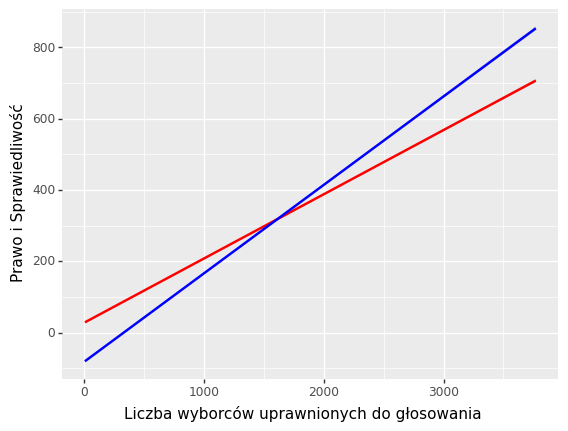

<ggplot: (165726168221)>

In [15]:
(
    gg.ggplot(big_dataset, gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Prawo i Sprawiedliwość"))
    #+ gg.geom_point(size = 0.1, color='red')
    + gg.geom_smooth(color='red')
    #+ gg.geom_point(big_dataset, gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Koalicja Europejska"), size = 0.1, color = 'blue')
    + gg.geom_smooth(big_dataset, gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Koalicja Europejska"), color = 'blue')
)

In [44]:
results = ['Liczba wyborców uprawnionych do głosowania', 'Prawo i Sprawiedliwość', 'Koalicja Europejska']

size_of_areas = big_dataset[results]

size_of_areas['percentiles'] = pd.qcut(size_of_areas['Liczba wyborców uprawnionych do głosowania'], 50)

count_votes = pd.DataFrame(size_of_areas.groupby(['percentiles']).mean()).reset_index()
count_votes


C:\Users\ggap9\AppData\Local\Temp/ipykernel_20384/312631242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,percentiles,Liczba wyborców uprawnionych do głosowania,Prawo i Sprawiedliwość,Koalicja Europejska
0,"(4.999, 56.0]",38.012433,9.211368,5.284192
1,"(56.0, 101.36]",76.801512,16.241966,9.345936
2,"(101.36, 213.0]",154.712727,34.178182,18.978182
3,"(213.0, 304.0]",261.612844,65.012844,23.732110
4,"(304.0, 366.0]",336.806452,80.605735,30.913978
5,"(366.0, 413.0]",391.929889,92.464945,33.976015
6,"(413.0, 455.0]",434.486989,103.150558,39.133829
7,"(455.0, 493.0]",474.547273,114.458182,42.163636
8,"(493.0, 529.0]",511.325368,123.386029,45.685662
9,"(529.0, 568.0]",549.477231,128.548270,52.859745


C:\Users\ggap9\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\ggap9\AppData\Roaming\Python\Python39\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\ggap9\AppData\Roaming\Python\Python39\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


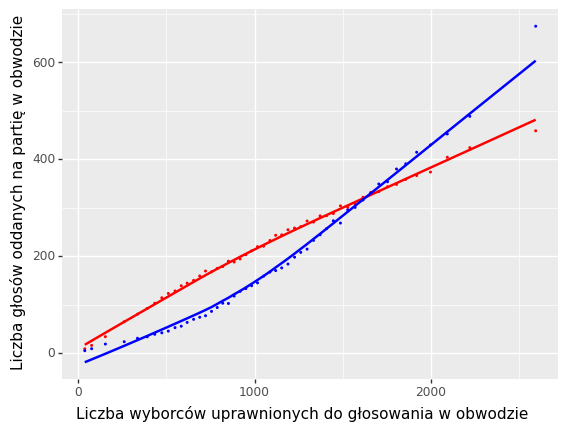

<ggplot: (165727964272)>

In [45]:
(
    gg.ggplot(count_votes, gg.aes(x = "Liczba wyborców uprawnionych do głosowania w obwodzie", y = "Liczba głosów oddanych na partię w obwodzie"))
    + gg.geom_point(count_votes, gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Prawo i Sprawiedliwość"), size = 0.2, color='red')
    + gg.geom_point(count_votes, gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Koalicja Europejska"), size = 0.2, color = 'blue')
    + gg.geom_smooth(count_votes, gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Prawo i Sprawiedliwość"), color="red", show_legend = True)
    + gg.geom_smooth(count_votes, gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Koalicja Europejska"), color="blue", show_legend = True)
    + gg.scale_color_identity(guide='legend')
)